**projot youcode**


In [1]:
# Importation des bibliotheques 
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

path=r'C:\Users\pc\Desktop\email spaming\data-sell4all.csv'
if not os.path.exists(path):
    print('il existe pas')

else:
     
    encodings = ['utf-8', 'latin1', 'cp1252']

    
    for encoding in encodings:
        try:
            df = pd.read_csv(path, encoding=encoding)
            print(f"Fichier lu avec succès avec l'encodage {encoding}")
            break
        except UnicodeDecodeError:
            print(f"Échec de la lecture avec l'encodage {encoding}")
            continue
    else:
        raise ValueError("Impossible de lire le fichier avec les encodages fournis.")


Échec de la lecture avec l'encodage utf-8
Fichier lu avec succès avec l'encodage latin1


In [2]:
df.head()

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [4]:
print("Le fichier CSV contient", df.shape[0], "lignes et", df.shape[1], "colonnes.")
print("Les colonnes sont:", df.columns.tolist())
print("Les types de donnees des champs sont:", df.dtypes)

Le fichier CSV contient 65 lignes et 4 colonnes.
Les colonnes sont: ['Pays', ' Age ', 'Genre', 'Dépenses des clients']
Les types de donnees des champs sont: Pays                    object
 Age                    object
Genre                   object
Dépenses des clients    object
dtype: object


**je dois chnager le nom de la colonne age pour suprimmer les espaces et changer le type des colonnes(Age et depenses des clients)**

In [5]:
df['Age']=df[' Age ']

In [6]:
df.drop(columns=[' Age '], inplace=True)

In [7]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [8]:
df['Dépenses des clients'] = df['Dépenses des clients'].replace(r'[^\d.]+', '', regex=True)


df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')


**la médiane et la moyenne des colonnes(Age et Dépenses des clients )**

In [9]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()
median_expenses = df['Dépenses des clients'].median()
mean_expenses = df['Dépenses des clients'].mean()

print(f"Médiane de l'âge: {median_age}")
print(f"Moyenne de l'âge: {mean_age}")
print(f"Médiane des dépenses des clients: {median_expenses}")
print(f"Moyenne des dépenses des clients: {mean_expenses}")

Médiane de l'âge: 36.0
Moyenne de l'âge: 52.42372881355932
Médiane des dépenses des clients: 162.875
Moyenne des dépenses des clients: 34184.35983870967


**une visualisation des données du graphique à barres qui montre les dépenses
des clients par pay,**

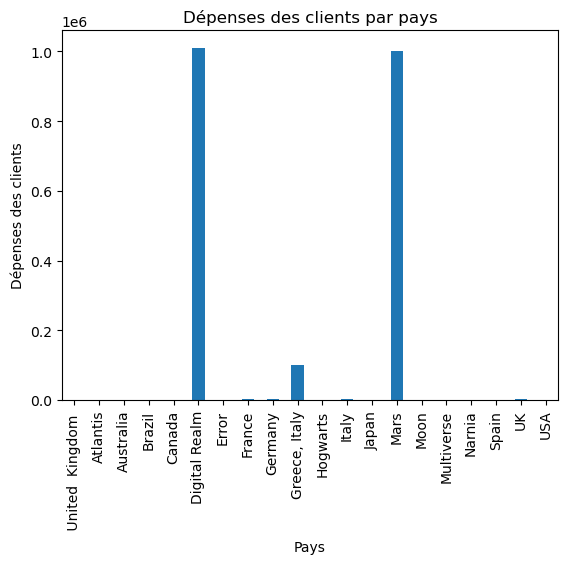

In [10]:
df.groupby('Pays')['Dépenses des clients'].sum().plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Dépenses des clients')
plt.title('Dépenses des clients par pays')
plt.show()

In [12]:
df['Dépenses des clients']

0         150.50
1         200.75
2          75.25
3         180.00
4         250.30
         ...    
60    1010101.01
61           NaN
62          0.00
63     100200.00
64           NaN
Name: Dépenses des clients, Length: 65, dtype: float64

**les lignes avec moins de 10 € de dépenses client**

In [13]:

df = df[df['Dépenses des clients'] >= 10]

    # Nettoyer les doublons
df = df.drop_duplicates()

In [14]:
df['Dépenses des clients']

0         150.50
1         200.75
2          75.25
3         180.00
4         250.30
5          90.00
6         175.50
7         120.75
8          95.25
9         220.00
10        160.25
11         85.50
12        190.75
13        140.00
14        210.50
15        130.25
16        170.00
18        200.25
19        110.50
20        180.75
21        100.25
22        230.00
23        150.75
24         80.50
25        215.25
26        145.00
27        175.50
28         70.25
29        240.75
30        165.00
31        195.25
32         85.75
33        205.50
34        135.25
35        120.00
36        225.75
37        155.50
38         90.25
39        210.00
40        170.25
41        125.75
42        190.00
43         75.50
44        220.25
45        160.75
46        185.00
47        105.25
48        235.50
49        140.25
50        180.00
52        210.50
53        145.75
54        195.25
55     999999.99
57        500.00
58        100.00
59         50.00
60    1010101.01
63     100200.

**les données nettoyées dans un nouveau fichier CSV**

In [59]:
df_cleaned = df[['Pays', 'Age', 'Genre', 'Dépenses des clients']]
df_cleaned.to_csv(r'C:\Users\pc\Desktop\email spaming\nv_data-sell4all.csv', index=False)
print("Les données nettoyées ont été enregistrées dans 'nv_data-sell4all-cleaned.csv'.")

Les données nettoyées ont été enregistrées dans 'nv_data-sell4all-cleaned.csv'.
